The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died.

Dataset: https://www.kaggle.com/c/titanic/data

    Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
    Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
    Name - Name
    Sex - Sex
    Age - Age
    Sibsp - Number of Siblings/Spouses Aboard
    Parch - Number of Parents/Children Aboard
    Ticket - Ticket Number
    Fare - Passenger Fare
    Cabin - Cabin
    Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

# Load Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings as wg
wg.filterwarnings('ignore')

In [3]:
# Setting default parameters for figure size
plt.rcParams['figure.figsize'] = [6, 3]
plt.rcParams['figure.dpi'] = 80

In [4]:
titanic = pd.read_csv('Titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Heatmap
To visualize the missing values

In [8]:
plt.style.use('ggplot')

<AxesSubplot:>

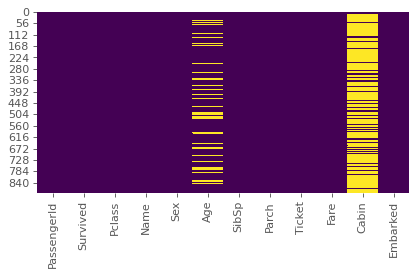

In [9]:
sns.heatmap(titanic.isnull(), cmap = 'viridis', cbar = False)

In [10]:
corrmat = titanic.corr()
corrmat

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

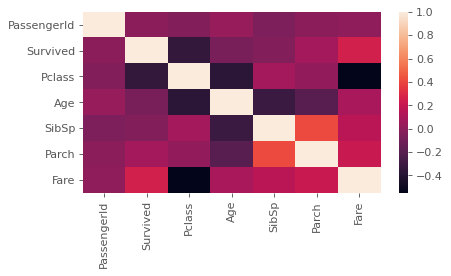

In [11]:
sns.heatmap(corrmat)

In [12]:
cols = titanic.columns
cols

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

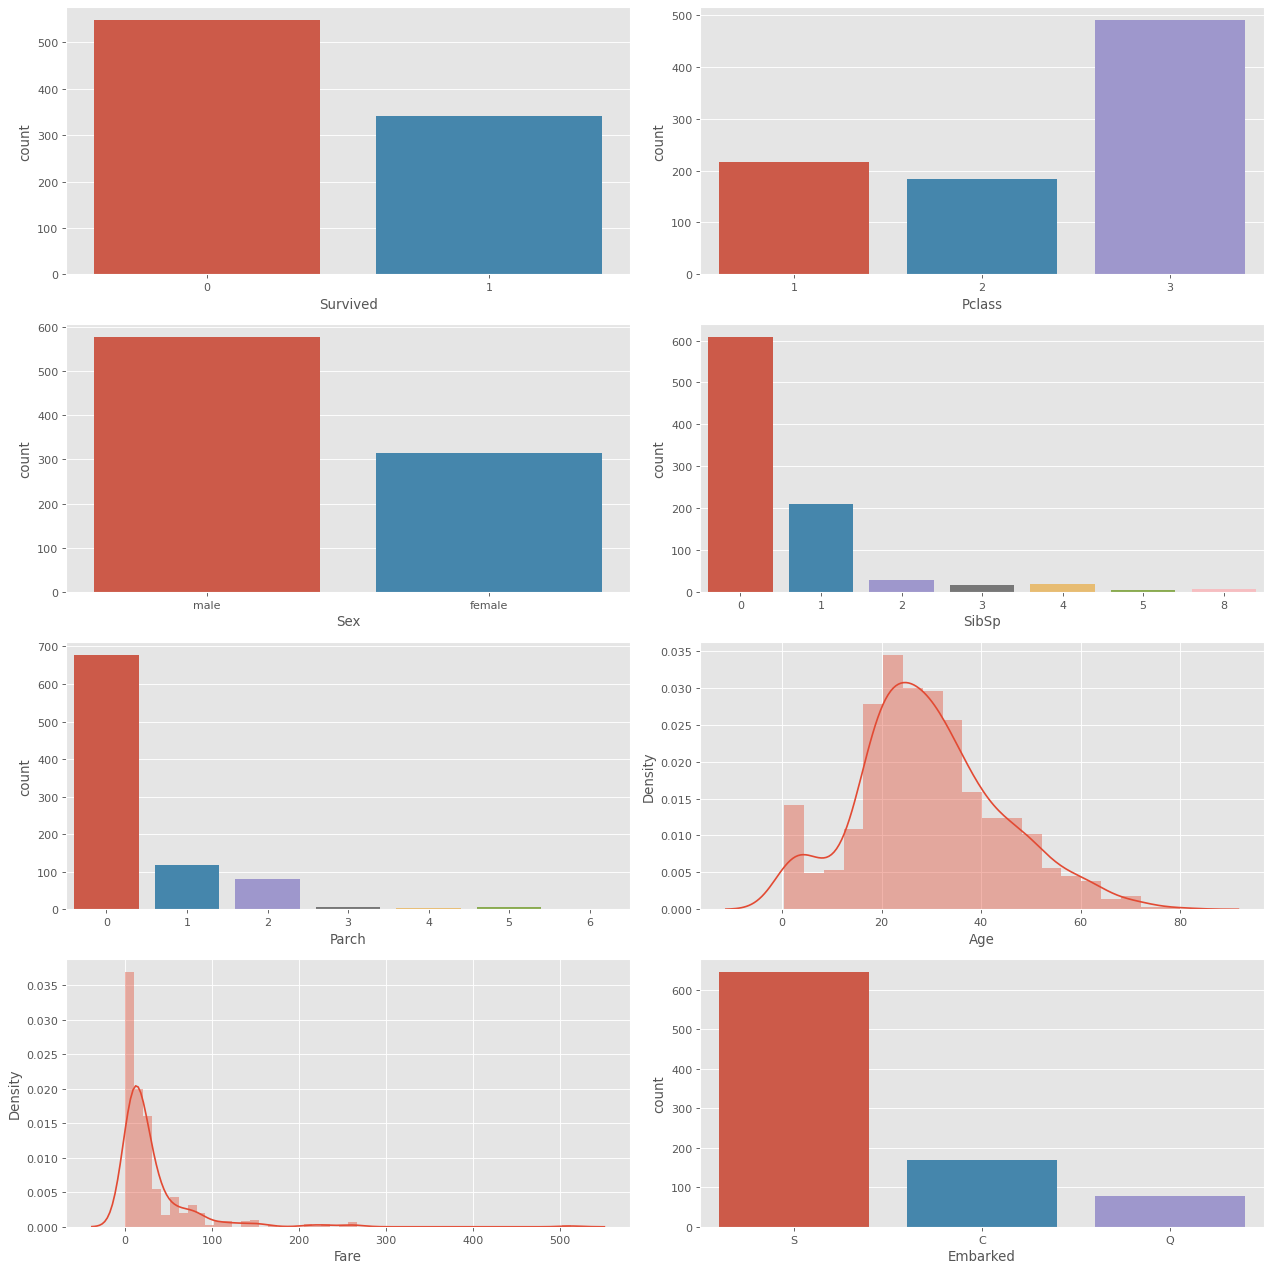

In [13]:
fig, ax = plt.subplots(4, 2, figsize = [16,16])
sns.countplot('Survived', data = titanic, ax = ax[0][0])
sns.countplot('Pclass', data = titanic, ax = ax[0][1])
sns.countplot('Sex', data = titanic, ax = ax[1][0])
sns.countplot('SibSp', data = titanic, ax = ax[1][1])
sns.countplot('Parch', data = titanic, ax = ax[2][0])
sns.countplot('Embarked', data = titanic, ax = ax[3][1])

sns.distplot(titanic['Age'], ax = ax[2][1], kde = True)# for continuous data
sns.distplot(titanic['Fare'], ax = ax[3][0], kde = True)

plt.tight_layout()

# Survived

In [14]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

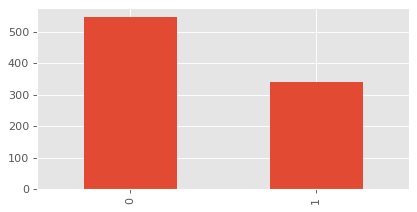

In [15]:
titanic['Survived'].value_counts().plot(kind = 'bar')

<AxesSubplot:ylabel='Survived'>

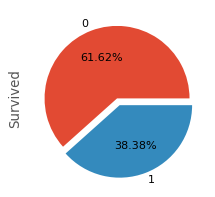

In [16]:
exp = [0, 0.1]
titanic['Survived'].value_counts().plot.pie(autopct = '%1.2f%%', explode = exp)

# PClass

In [17]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [18]:
titanic.groupby(['Pclass', 'Survived'])['Survived'].count()
# to see how many of each pclass survived

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

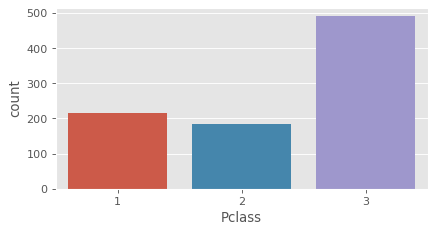

In [19]:
sns.countplot('Pclass', data = titanic)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

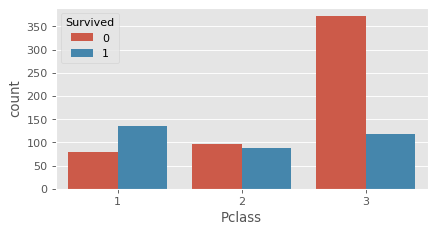

In [20]:
sns.countplot('Pclass', data = titanic, hue = 'Survived')

<AxesSubplot:ylabel='Pclass'>

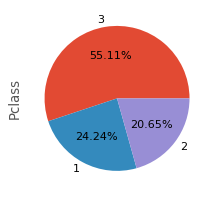

In [21]:
titanic['Pclass'].value_counts().plot.pie(autopct = '%1.2f%%')

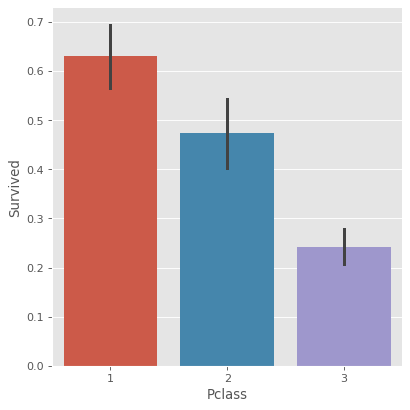

In [22]:
sns.catplot(x = 'Pclass', y= 'Survived', data = titanic, kind = 'bar')

# Sex

In [23]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [24]:
titanic.groupby(['Sex', 'Survived'])['Survived'].count()
# How many of each sex survived or died

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

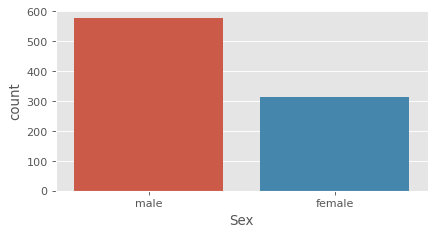

In [25]:
sns.countplot('Sex', data = titanic)

<AxesSubplot:xlabel='Sex', ylabel='count'>

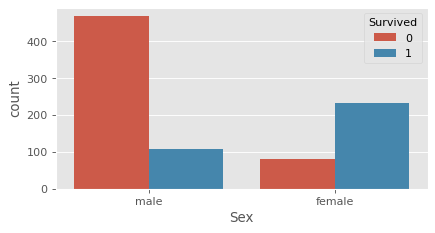

In [26]:
sns.countplot('Sex', data = titanic, hue = 'Survived')

<AxesSubplot:ylabel='Sex'>

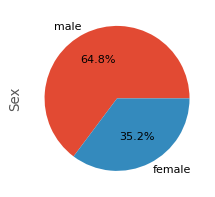

In [27]:
titanic['Sex'].value_counts().plot.pie(autopct = '%1.1f%%')

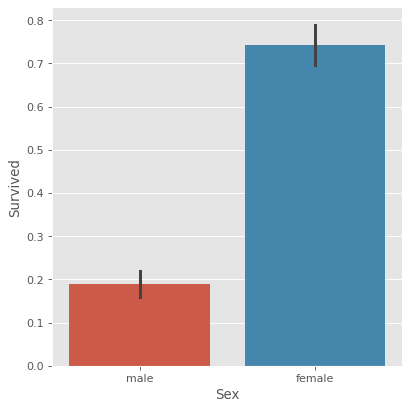

In [28]:
# To visualize how many people survived
sns.catplot(x = 'Sex', y = 'Survived', kind = 'bar', data = titanic)

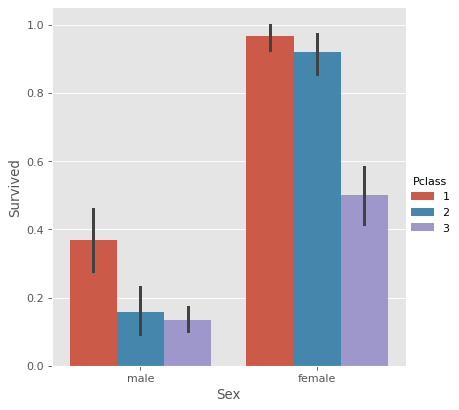

In [29]:
# To visualize how many people of each class survived
sns.catplot(x = 'Sex', y = 'Survived', kind = 'bar', data = titanic, hue = 'Pclass')

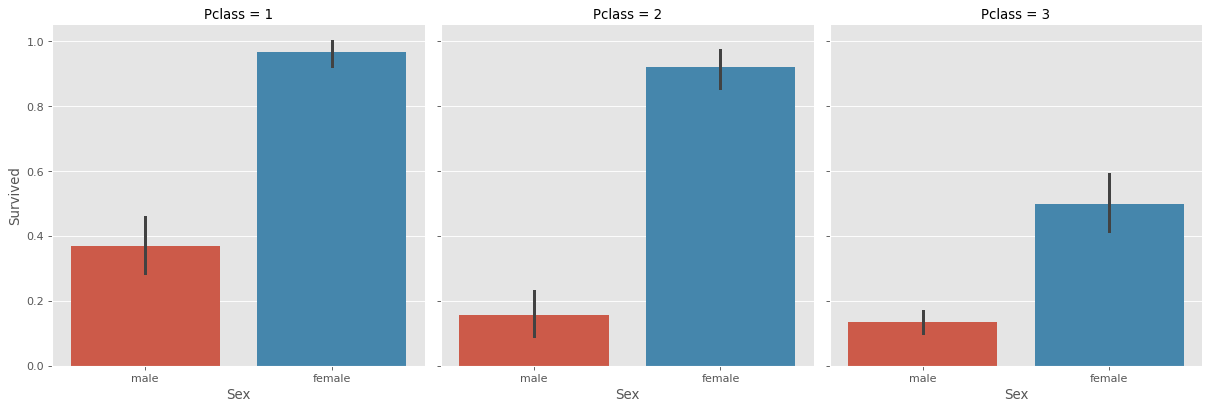

In [30]:
sns.catplot(x = 'Sex', y = 'Survived', kind = 'bar', data = titanic, col = 'Pclass')
# to check separately how many survived in each class

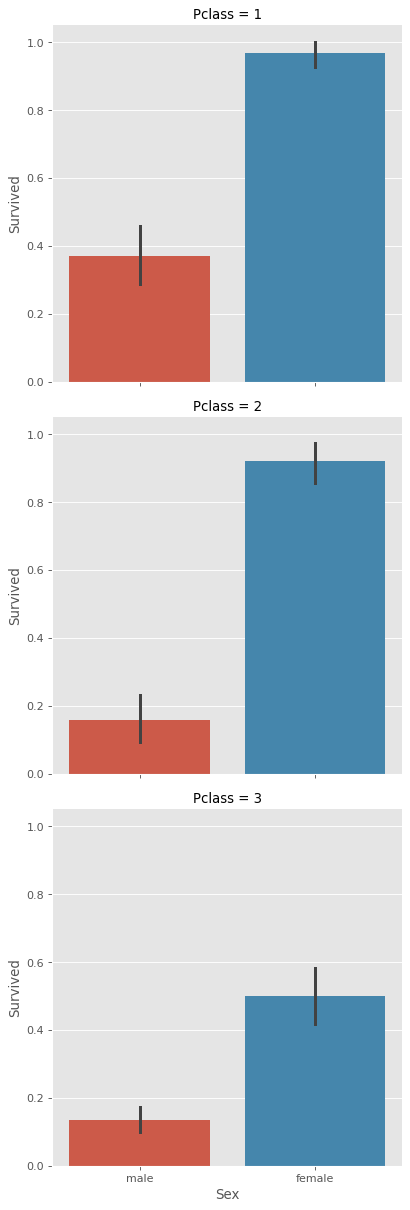

In [31]:
sns.catplot(x = 'Sex', y = 'Survived', kind = 'bar', data = titanic, row = 'Pclass')

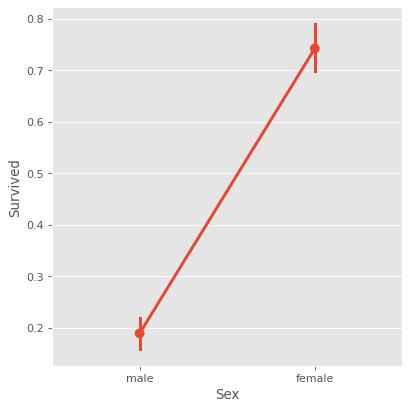

In [32]:
sns.catplot(x = 'Sex', y= 'Survived', data = titanic, kind = 'point')

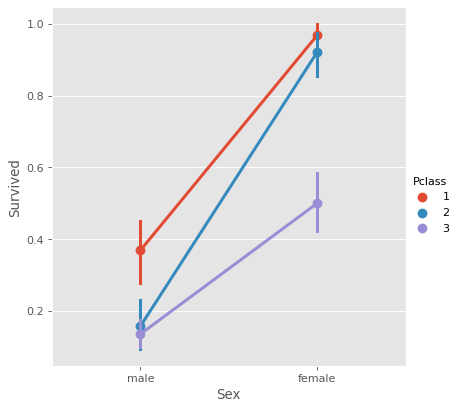

In [33]:
sns.catplot(x = 'Sex', y= 'Survived', data = titanic, kind = 'point', hue = 'Pclass')

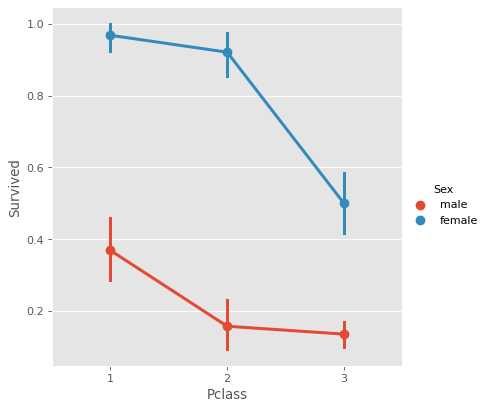

In [34]:
sns.catplot(x = 'Pclass', y= 'Survived', data = titanic, kind = 'point', hue = 'Sex')

# Age

In [35]:
# Age is a continuous variable so we can't plot a bar plot for this and also should not count each value

Text(0.5, 0, 'Age')

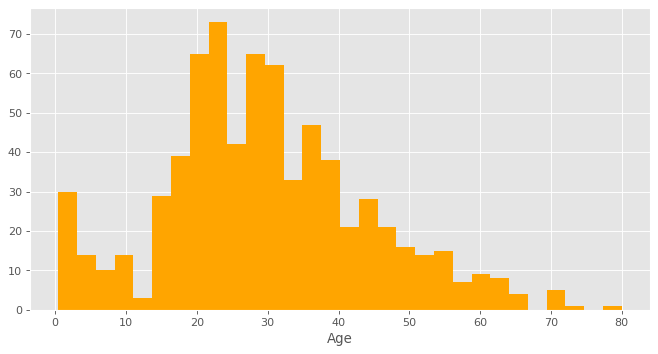

In [36]:
titanic['Age'].hist(bins = 30, color = 'orange', figsize = [10,5])
plt.xlabel('Age')

<AxesSubplot:xlabel='Age', ylabel='Density'>

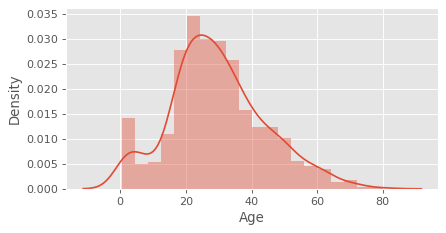

In [37]:
sns.distplot(titanic['Age'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

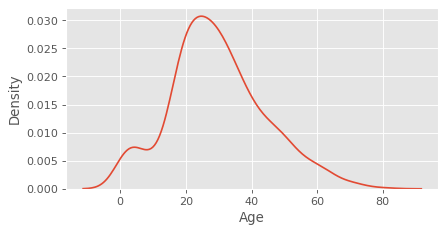

In [38]:
sns.distplot(titanic['Age'], hist = False)

<AxesSubplot:xlabel='Age', ylabel='Density'>

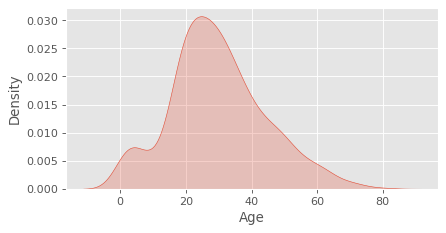

In [39]:
sns.kdeplot(titanic['Age'], shade = True)

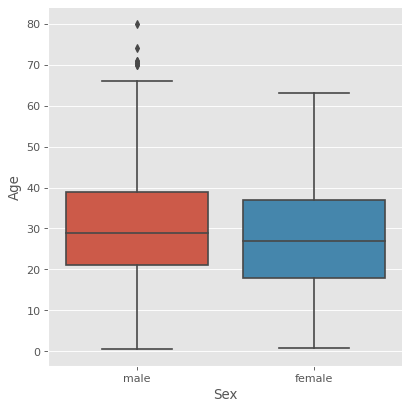

In [40]:
sns.catplot(x = 'Sex', y = 'Age', data = titanic, kind = 'box')

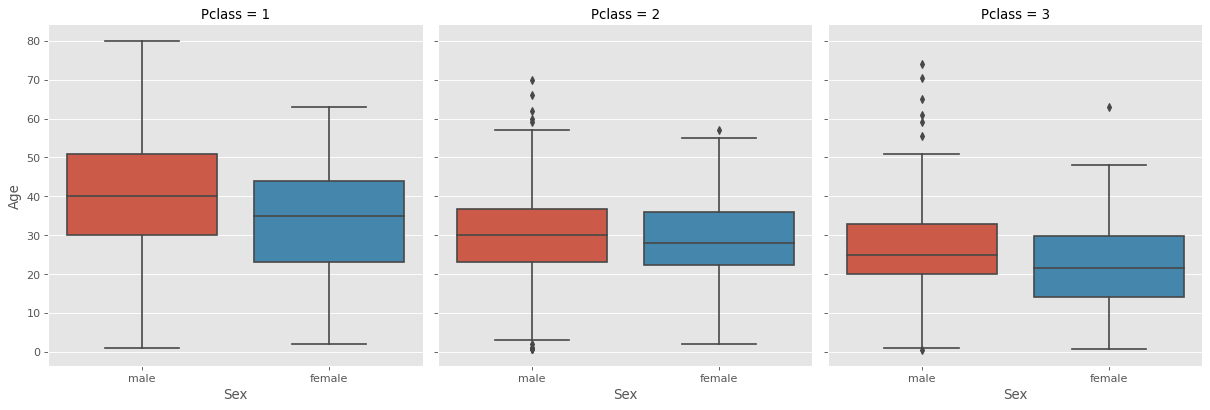

In [41]:
sns.catplot(x = 'Sex', y = 'Age', data = titanic, kind = 'box', col = 'Pclass')

# Fare

<AxesSubplot:>

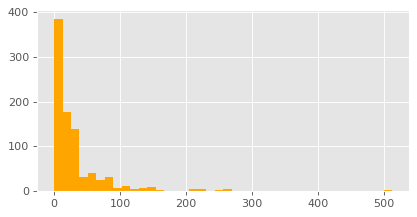

In [42]:
titanic['Fare'].hist(bins = 40, color = 'orange')

<AxesSubplot:xlabel='Fare', ylabel='Density'>

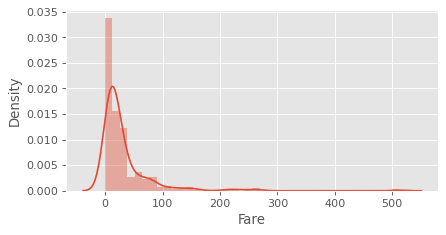

In [43]:
# same plot
sns.distplot(titanic['Fare'],bins = 40)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

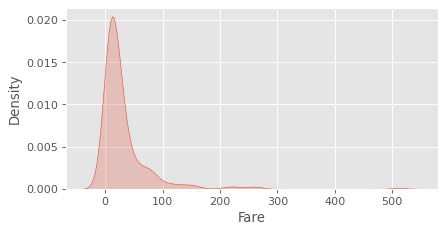

In [44]:
sns.kdeplot(titanic['Fare'], shade = True)

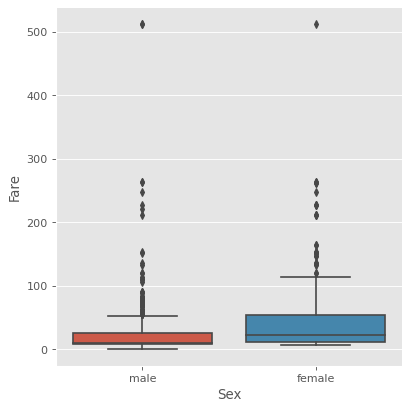

In [72]:
sns.catplot(x = 'Sex', y = 'Fare', kind = 'box', data = titanic)
# how fare varies with sex

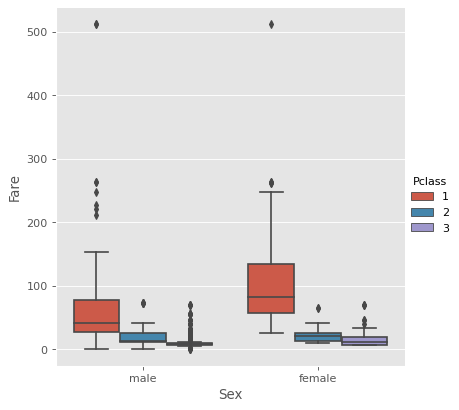

In [46]:
sns.catplot(x = 'Sex', y = 'Fare', kind = 'box', data = titanic, hue = 'Pclass')

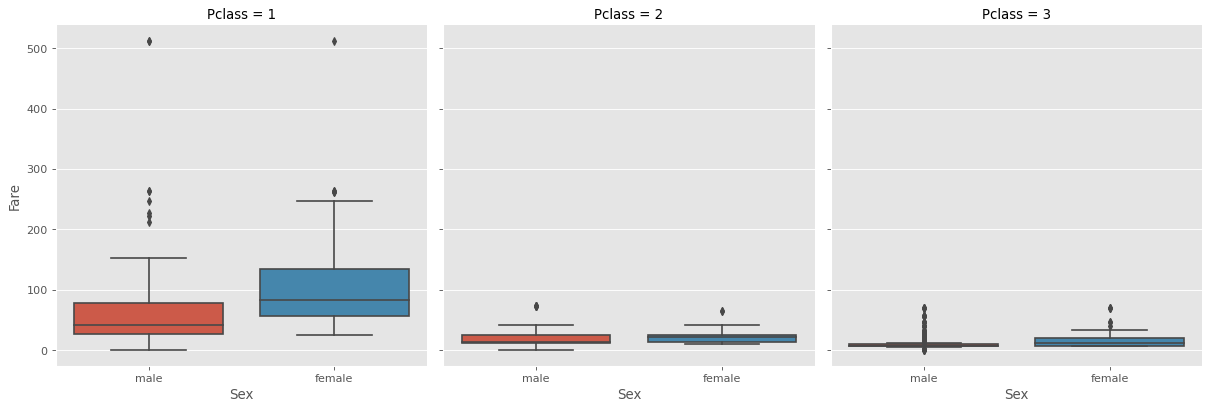

In [47]:
sns.catplot(x = 'Sex', y = 'Fare', kind = 'box', data = titanic, col = 'Pclass')

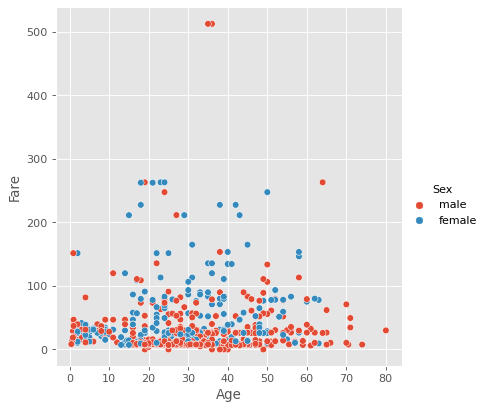

In [48]:
sns.relplot(x = 'Age', y = 'Fare', data = titanic, hue = 'Sex')

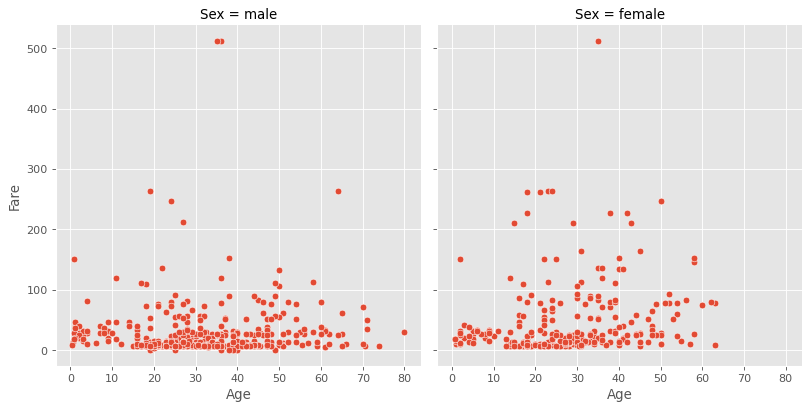

In [49]:
sns.relplot(x = 'Age', y = 'Fare', data = titanic, col = 'Sex')

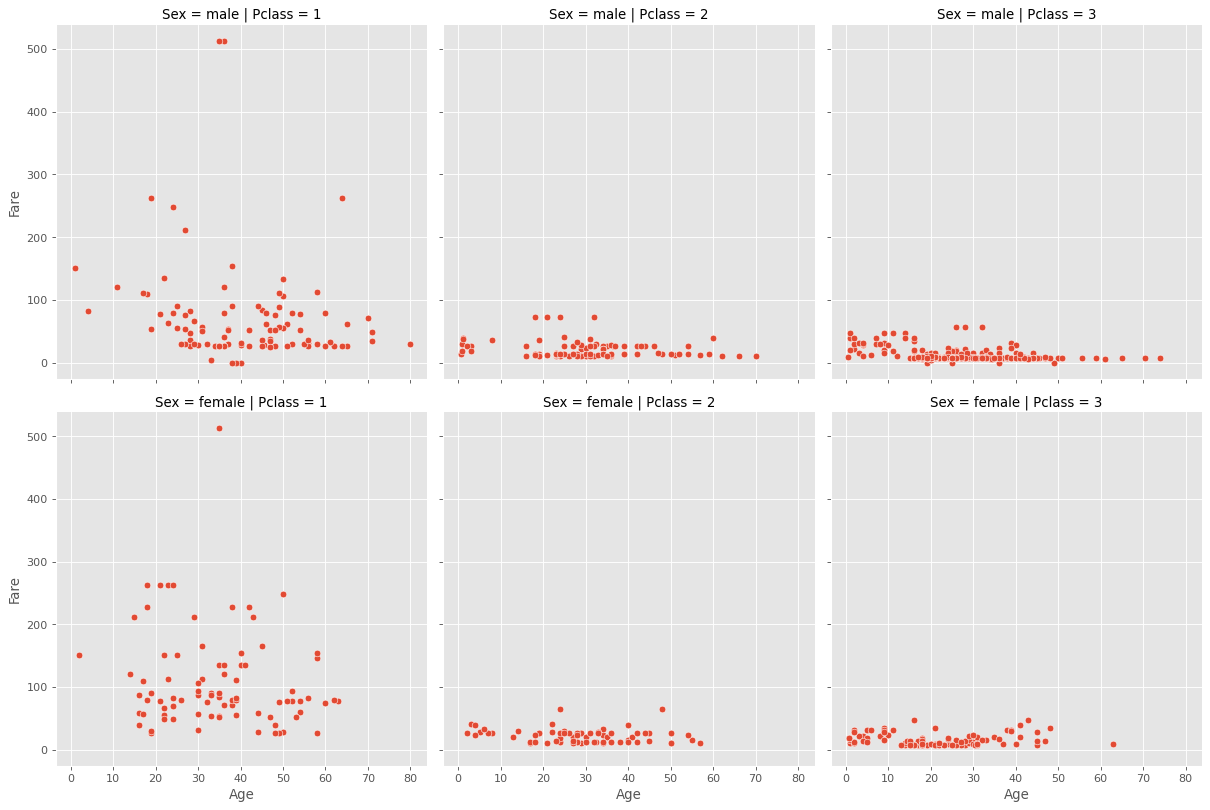

In [50]:
sns.relplot(x = 'Age', y = 'Fare', data = titanic, row = 'Sex', col = 'Pclass')

# SibPp
    Sibling and Spouse

In [51]:
titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

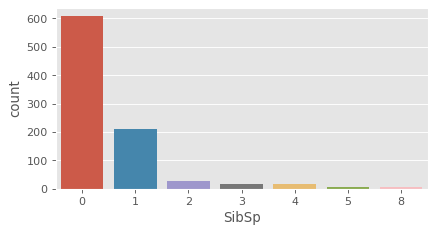

In [52]:
sns.countplot('SibSp', data = titanic)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

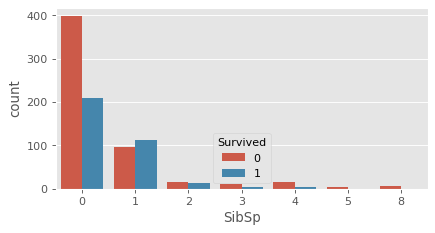

In [53]:
sns.countplot('SibSp', data = titanic, hue = 'Survived')

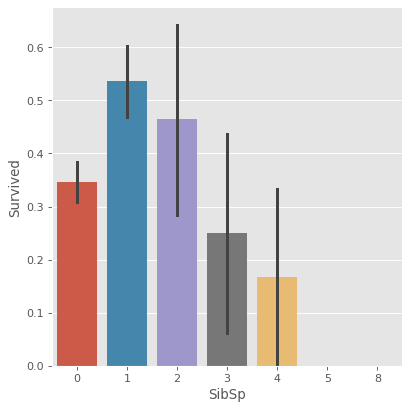

In [54]:
sns.catplot(x = 'SibSp', y = 'Survived', data = titanic, kind= 'bar')

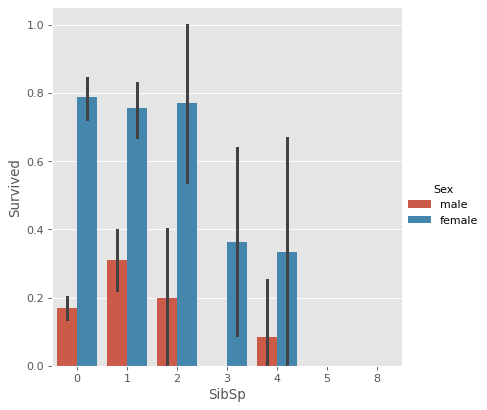

In [55]:
sns.catplot(x = 'SibSp', y = 'Survived', data = titanic, kind= 'bar', hue = 'Sex')

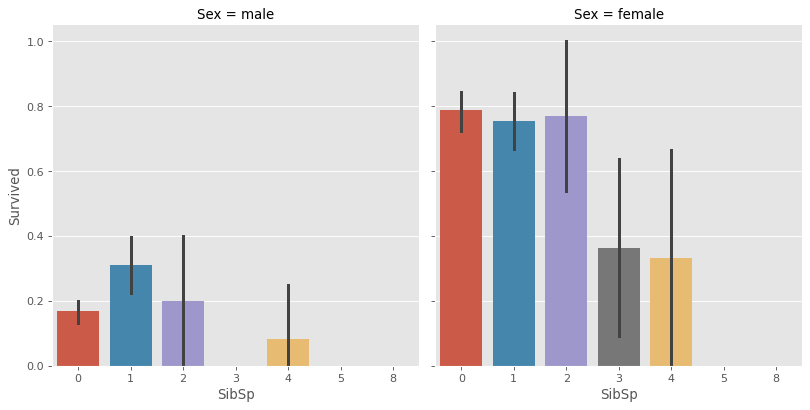

In [56]:
sns.catplot(x = 'SibSp', y = 'Survived', data = titanic, kind= 'bar',col = 'Sex')

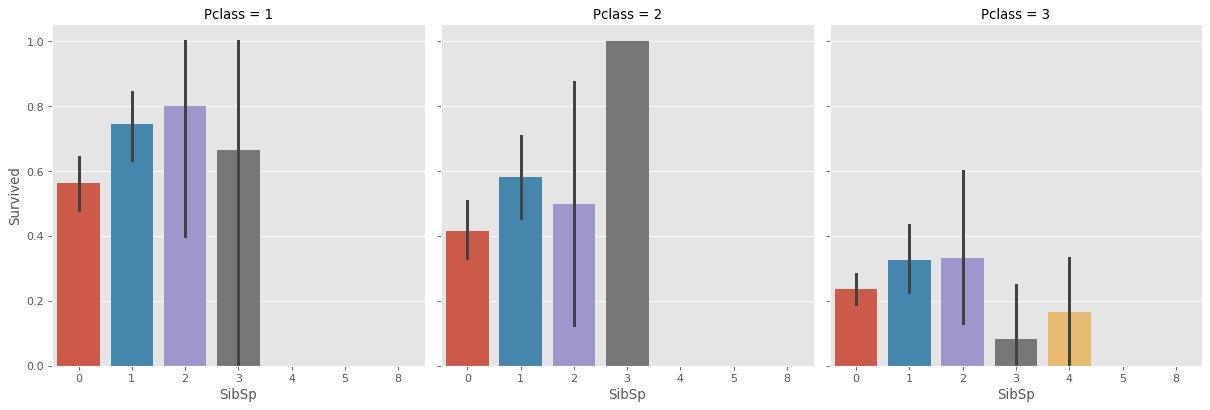

In [57]:
sns.catplot(x = 'SibSp', y = 'Survived', data = titanic, kind= 'bar',col = 'Pclass')

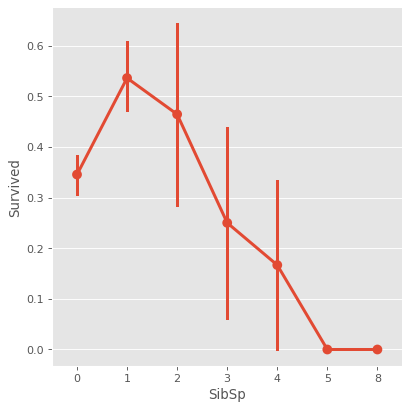

In [58]:
sns.catplot(x = 'SibSp', y = 'Survived', data = titanic, kind = 'point')

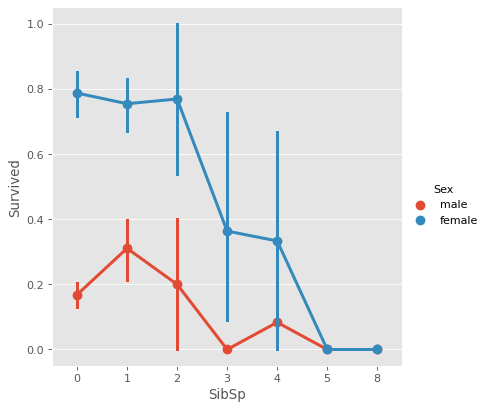

In [59]:
sns.catplot(x = 'SibSp', y = 'Survived', data = titanic, kind = 'point', hue = 'Sex')

# Parch
     Number of Parents/Children Aboard

In [60]:
titanic['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='count'>

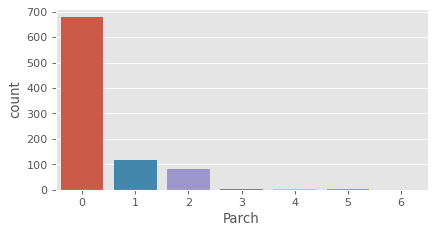

In [61]:
sns.countplot('Parch', data = titanic)

<AxesSubplot:xlabel='Parch', ylabel='count'>

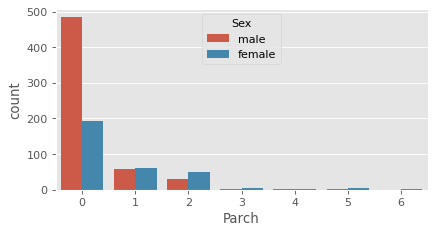

In [62]:
sns.countplot('Parch', data = titanic, hue = 'Sex')

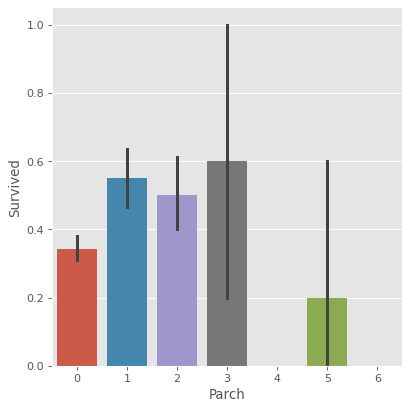

In [63]:
sns.catplot(x = 'Parch', y = 'Survived', data = titanic, kind = 'bar')

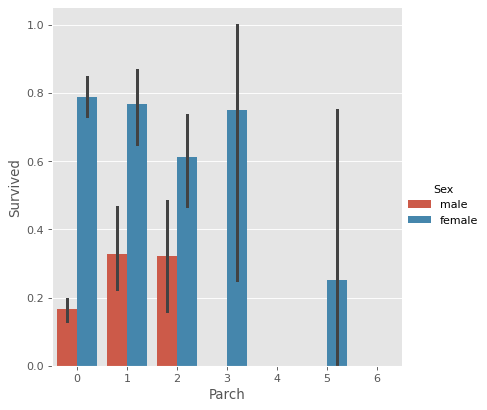

In [64]:
sns.catplot(x = 'Parch', y = 'Survived', data = titanic, kind = 'bar', hue = 'Sex')

# Embarked
    Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [65]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

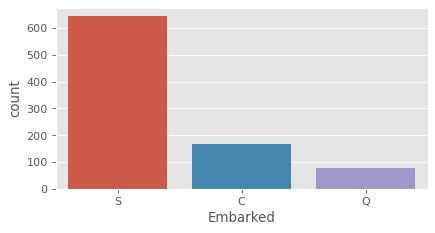

In [66]:
sns.countplot('Embarked', data = titanic)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

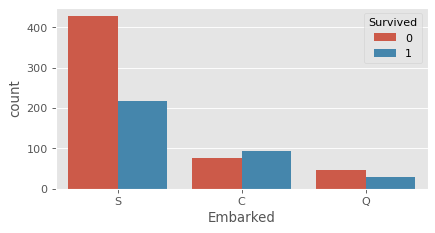

In [67]:
sns.countplot('Embarked', data = titanic, hue = 'Survived')

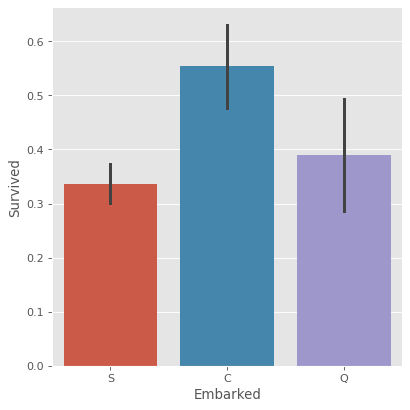

In [68]:
sns.catplot(x = 'Embarked', y = 'Survived', data = titanic, kind = 'bar')

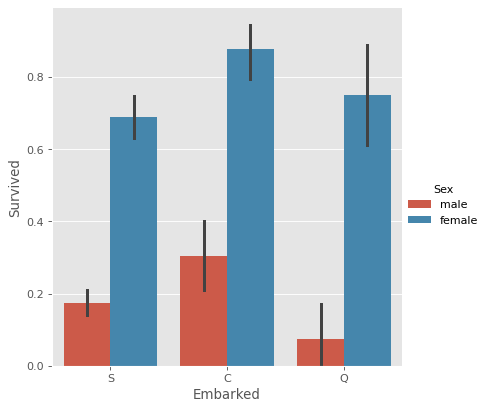

In [69]:
sns.catplot(x = 'Embarked', y = 'Survived', data = titanic, kind = 'bar', hue = 'Sex')

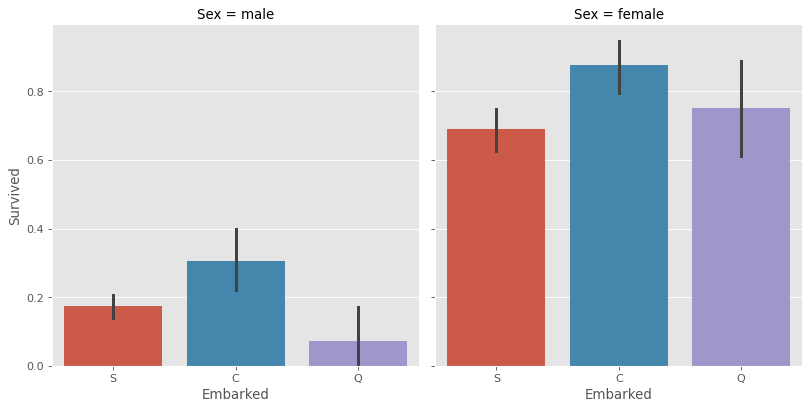

In [70]:
sns.catplot(x = 'Embarked', y = 'Survived', data = titanic, kind = 'bar', col = 'Sex')